In [1]:
import pandas as pd

df = pd.read_csv('realtor-data.csv')

df.head()

,bed,bath,city,state,zip_code,house_size,price,Unnamed: 7,Unnamed: 8
0,3.0,2.0,Adjuntas,Puerto Rico,601.0,920.0,105000,NaN,NaN
1,4.0,2.0,Adjuntas,Puerto Rico,601.0,1527.0,80000,NaN,NaN
2,2.0,1.0,Juana Diaz,Puerto Rico,795.0,748.0,67000,NaN,NaN
3,4.0,2.0,Ponce,Puerto Rico,731.0,1800.0,145000,NaN,NaN
4,6.0,2.0,Mayaguez,Puerto Rico,680.0,NaN,65000,NaN,NaN


In [2]:
df = df.drop(df.columns[-2:], axis = 1)
df.head()

,bed,bath,city,state,zip_code,house_size,price
0,3.0,2.0,Adjuntas,Puerto Rico,601.0,920.0,105000
1,4.0,2.0,Adjuntas,Puerto Rico,601.0,1527.0,80000
2,2.0,1.0,Juana Diaz,Puerto Rico,795.0,748.0,67000
3,4.0,2.0,Ponce,Puerto Rico,731.0,1800.0,145000
4,6.0,2.0,Mayaguez,Puerto Rico,680.0,NaN,65000


In [3]:
df.isnull().sum()

bed           24950
bath          24888
city             52
state             0
zip_code        195
house_size    24918
price             0
dtype: int64

In [4]:
# Filling missing values in 'bed', 'bath', and 'house_size' with median
df['bed'] = df['bed'].fillna(df['bed'].median())
df['bath'] = df['bath'].fillna(df['bath'].median())
df['house_size'] = df['house_size'].fillna(df['house_size'].median())

# Dropping rows with missing 'city' or 'zip_code'
df = df.dropna(subset=['city', 'zip_code'])


In [5]:
from sklearn.preprocessing import LabelEncoder

le_city = LabelEncoder()
le_state = LabelEncoder()
le_zip_code = LabelEncoder()

df['city'] = le_city.fit_transform(df['city'])
df['state'] = le_state.fit_transform(df['state'])
df['zip_code'] = le_zip_code.fit_transform(df['zip_code'])

# Save the mappings
city_mapping = dict(zip(le_city.classes_, le_city.transform(le_city.classes_)))
state_mapping = dict(zip(le_state.classes_, le_state.transform(le_state.classes_)))
zip_code_mapping = dict(zip(le_zip_code.classes_, le_zip_code.transform(le_zip_code.classes_)))



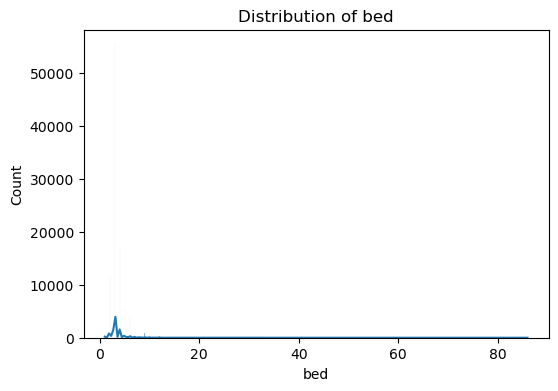

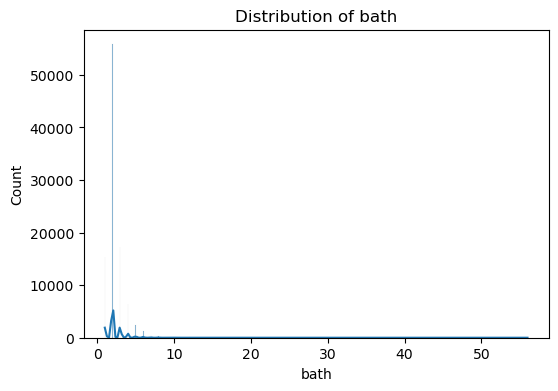

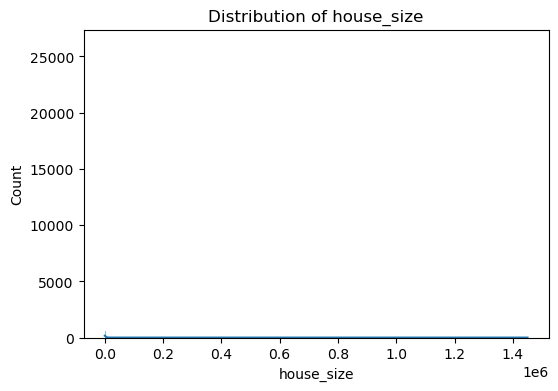

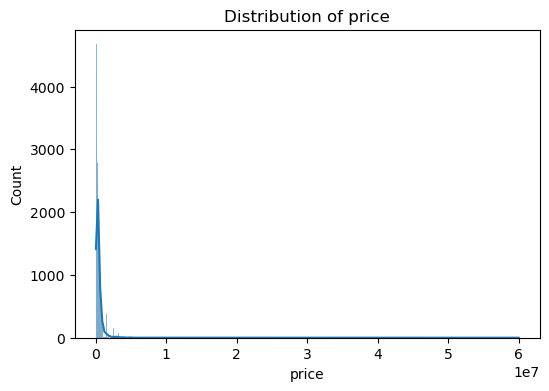

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analyzing distributions of each feature using histograms
for column in ['bed', 'bath', 'house_size', 'price']:
    plt.figure(figsize=(6,4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


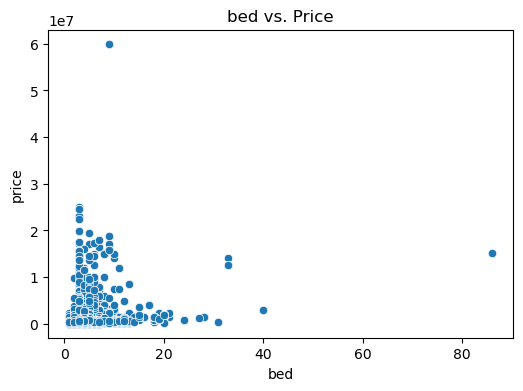

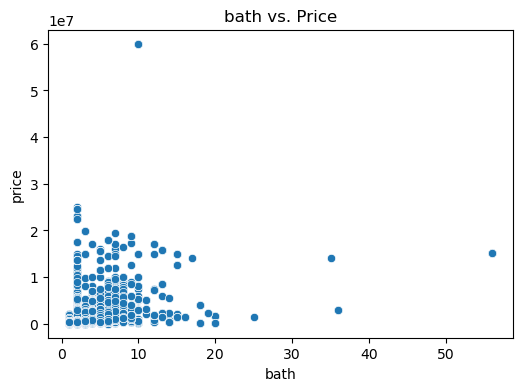

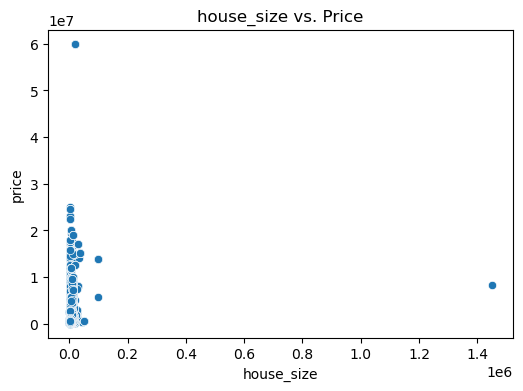

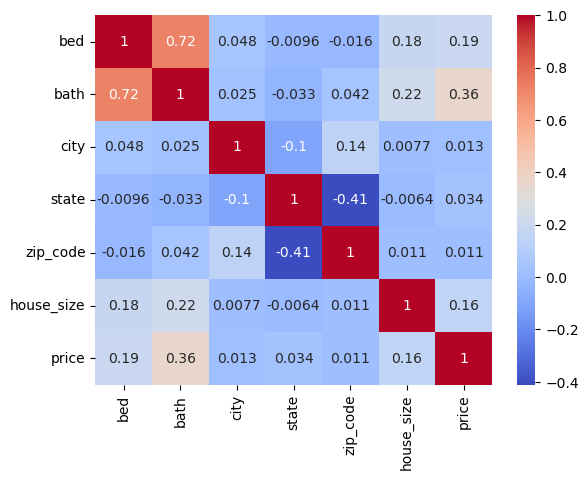

In [36]:
# Scatter plots of each feature vs. price
for column in ['bed', 'bath', 'house_size']:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=column, y='price')
    plt.title(f'{column} vs. Price')
    plt.show()

# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


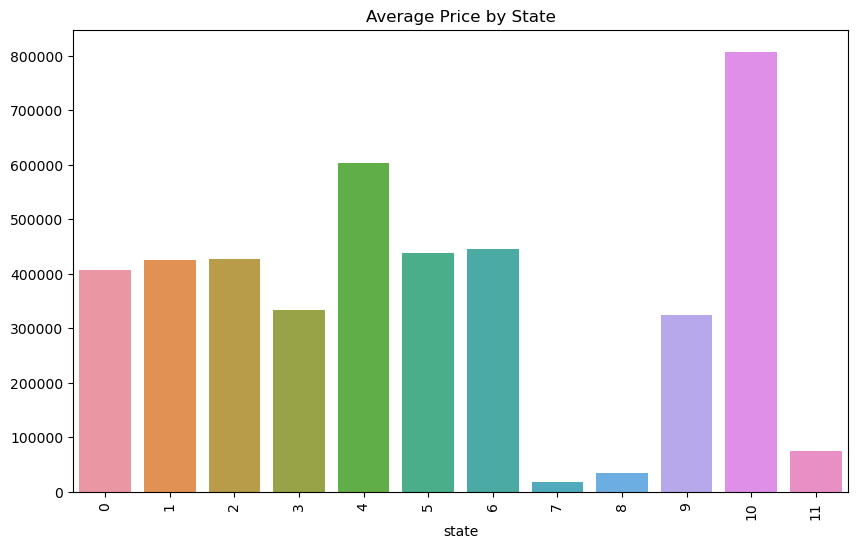

In [8]:
# Average price by state
avg_price_by_state = df.groupby('state')['price'].mean().sort_values(ascending=False)

# Plotting the results
plt.figure(figsize=(10,6))
sns.barplot(x=avg_price_by_state.index, y=avg_price_by_state.values)
plt.title('Average Price by State')
plt.xticks(rotation=90)
plt.show()


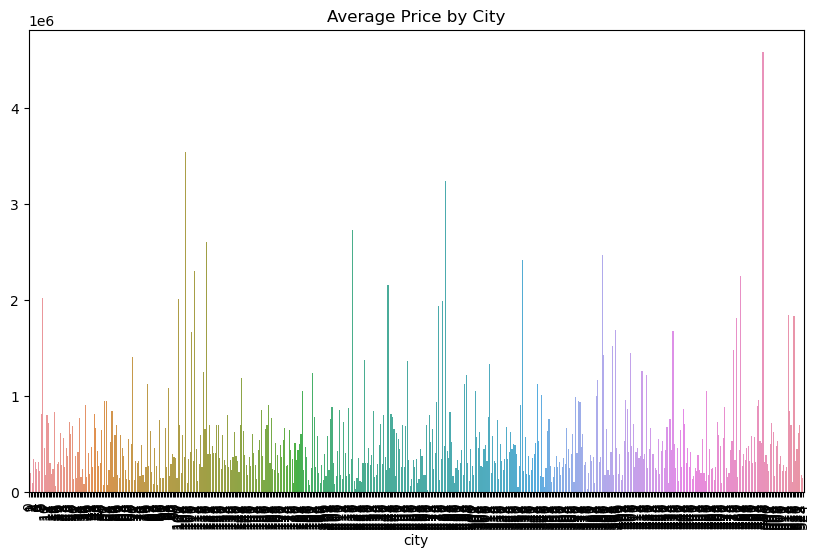

In [9]:
# Average price by city
avg_price_by_city = df.groupby('city')['price'].mean().sort_values(ascending=False)


# Plotting the results
plt.figure(figsize=(10,6))
sns.barplot(x=avg_price_by_city.index, y=avg_price_by_city.values)
plt.title('Average Price by City')
plt.xticks(rotation=90)
plt.show()



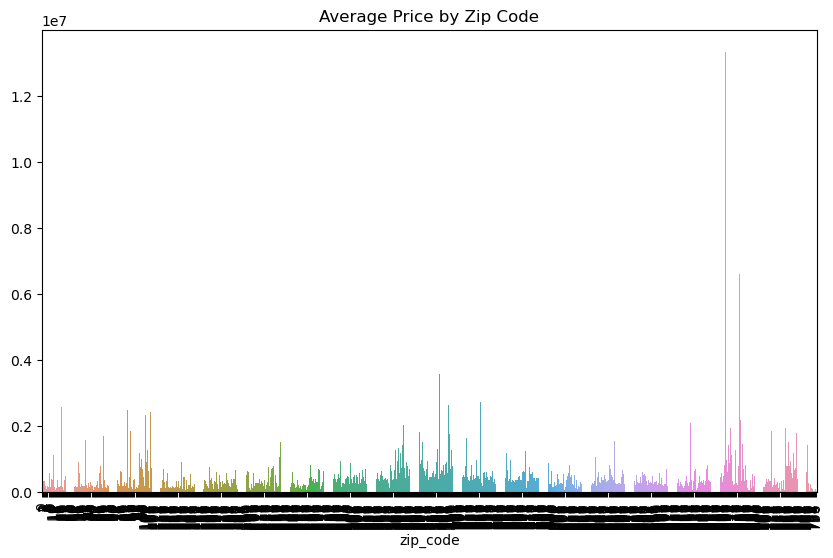

In [10]:
# Average price by zip_code
avg_price_by_zip_code = df.groupby('zip_code')['price'].mean().sort_values(ascending=False)
# Plotting the results
plt.figure(figsize=(10,6))
sns.barplot(x=avg_price_by_zip_code.index, y=avg_price_by_zip_code.values)
plt.title('Average Price by Zip Code')
plt.xticks(rotation=90)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

# Assuming that df is your DataFrame and "price" is the target variable
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import pickle


In [35]:
## Saving the mappings

with open('city_mapping.pkl', 'wb') as file:
    pickle.dump(city_mapping, file)

with open('state_mapping.pkl', 'wb') as file:
    pickle.dump(state_mapping, file)

with open('zip_code_mapping.pkl', 'wb') as file:
    pickle.dump(zip_code_mapping, file)



In [31]:

# Initialize the models
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

for model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Calculate the performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rscore = r2_score(y_test, y_pred)

    print(f"Model: {model.__class__.__name__}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R_Squared: {rscore}")
    # Save the DecisionTreeRegressor and RandomForestRegressor models
    if model.__class__.__name__ in ['DecisionTreeRegressor', 'RandomForestRegressor']:
        with open(f'{model.__class__.__name__}.pkl', 'wb') as f:
            pickle.dump(model, f)
    print('--------------------------')

Model: LinearRegression
MAE: 309415.9217621816
RMSE: 825489.8038734724
R_Squared: 0.16367637104313326
--------------------------
Model: DecisionTreeRegressor
MAE: 67441.64403158889
RMSE: 496046.9597907754
R_Squared: 0.698007244409347
--------------------------
Model: RandomForestRegressor
MAE: 68119.2243346343
RMSE: 477037.38936344394
R_Squared: 0.7207097468423851
--------------------------
Model: GradientBoostingRegressor
MAE: 213886.37069325804
RMSE: 631308.2313491399
R_Squared: 0.5108592509006634
--------------------------


## HyperTuning Model Params

In [32]:
from sklearn.model_selection import GridSearchCV

# Specify the models
models_params = {
    'RandomForestRegressor': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [10, 50, 100, 200],
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5]
        }
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5]
        }
    }
}

# Perform Grid Search
for model_name, mp in models_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, n_jobs=-1, verbose = 1)
    clf.fit(X_train, y_train)

    print(f"Model: {model_name}")
    print(f"Best Score: {clf.best_score_}")
    print(f"Best Params: {clf.best_params_}")
    print('--------------------------')


Fitting 5 folds for each of 144 candidates, totalling 720 fits


KeyboardInterrupt: 

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
y_pred = linear_reg.predict(X_test_scaled)

linear_reg.score(X_test_scaled,y_test)

0.16367637104314892

In [20]:
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train_scaled,y_train)
y_pred = ridge_reg.predict(X_test_scaled)

ridge_reg.score(X_test_scaled,y_test)

0.16367945543961715

In [21]:
knn = KNeighborsRegressor(n_neighbors=10)

knn.fit(X_train_scaled,y_train)
knn.predict(X_test_scaled)

knn_score =  knn.score(X_test_scaled,y_test)
knn_score

0.6136895495738336

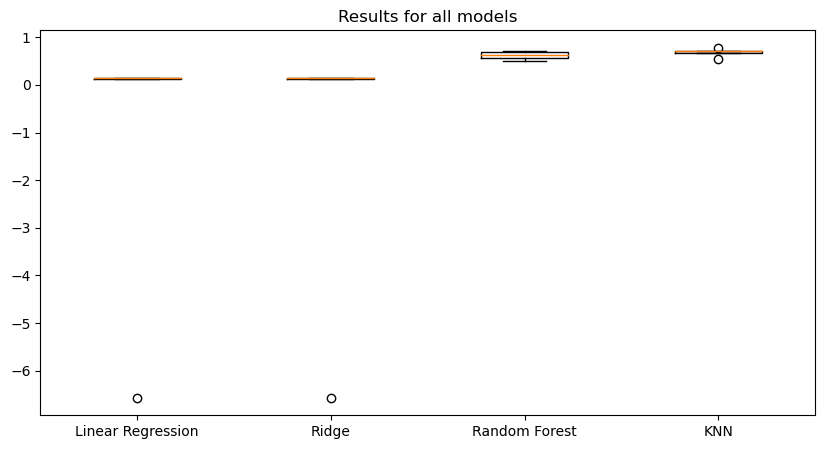

In [22]:
from sklearn.model_selection import cross_val_score,KFold
plt.figure(figsize=(10,5))
plt.title('Results for all models')
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1),"Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5),'KNN': KNeighborsRegressor(n_neighbors=10)}
outcome = []

for model in models.values():
    kf = KFold(n_splits=6,random_state = 42,shuffle = True)
    cv_result = cross_val_score(model,X_train_scaled,y_train,cv=kf)
    outcome.append(cv_result)
plt.boxplot(outcome,labels = models.keys())
plt.show()

In [14]:
import pandas as pd
# Zip Code Dataframe
zip_df = pd.read_csv('uszips.csv')

# Load in modified ML dataframe
df = pd.read_csv('df.csv')

# Merge the dataframes based on the zip code column
merged_df = pd.merge(df, zip_df, left_on='zip_code', right_on='zip', how='inner')
columns_to_drop = ['bed', 'bath', 'acre_lot', 'state', 'prev_sold_date', 'zcta','parent_zcta', 'county_fips', 'county_weights', 
                       'county_names_all', 'county_fips_all', 'imprecise', 'military', 'timezone']
merged_df = merged_df.drop(columns=columns_to_drop)

merged_df['zip_code'] = merged_df['zip_code'].astype(int)
merged_df.head()


,status,city_x,zip_code,house_size,price,zip,lat,lng,city_y,state_id,state_name,population,density,county_name
0,for_sale,Dorado,949,1192.0,110000.0,949,18.43166,-66.21349,Toa Baja,PR,Puerto Rico,69785.0,1309.2,Toa Baja
1,for_sale,Dorado,949,1192.0,110000.0,949,18.43166,-66.21349,Toa Baja,PR,Puerto Rico,69785.0,1309.2,Toa Baja
2,for_sale,Dorado,949,1192.0,110000.0,949,18.43166,-66.21349,Toa Baja,PR,Puerto Rico,69785.0,1309.2,Toa Baja
3,for_sale,Dorado,949,1192.0,110000.0,949,18.43166,-66.21349,Toa Baja,PR,Puerto Rico,69785.0,1309.2,Toa Baja
4,for_sale,Dorado,949,1192.0,110000.0,949,18.43166,-66.21349,Toa Baja,PR,Puerto Rico,69785.0,1309.2,Toa Baja
